In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from sklearn import metrics

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()



Saving League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv to League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv


In [ ]:
import pandas as pd
import io
 
lol = pd.read_csv(io.BytesIO(uploaded['League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv']))
print(lol)

    Team    Player Opponent Position Champion  Kills  Deaths  Assists  \
0    UOL      Boss       GS      Top  Camille      4       5        3   
1     GS     Crazy      UOL      Top     Gwen      3       1        9   
2    UOL  Ahahacik       GS   Jungle  Trundle      2       4        5   
3     GS    Mojito      UOL   Jungle    Talon      5       4       10   
4    UOL    Nomanz       GS      Mid  Leblanc      1       3        4   
..   ...       ...      ...      ...      ...    ...     ...      ...   
215  BYG     Maoan      UOL      Mid     Ryze      4       4        2   
216  UOL  Argonavt      BYG      Adc    Senna      1       3        9   
217  BYG     Doggo      UOL      Adc   Draven     10       2        4   
218  UOL    Santas      BYG  Support   Wukong      0       4        7   
219  BYG      Kino      UOL  Support    Rakan      0       5        9   

     Creep Score  Gold Earned  Champion Damage Share  Kill Participation  \
0            188        11107                  

In [ ]:
lol.shape

(220, 20)

In [ ]:
lol.describe()

,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.709091,2.718182,5.668182,200.340909,11008.159091,0.200000,0.608273,19.454545,8.704545,28.159091,2.090909,2.090909,0.545455,0.545455
std,2.579673,1.747179,3.888149,101.328153,3198.806207,0.095051,0.190404,15.713553,5.101614,18.051857,1.381849,1.381849,0.657050,0.657050
min,0.000000,0.000000,0.000000,14.000000,4714.000000,0.040000,0.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,156.000000,8691.250000,0.130000,0.500000,10.000000,5.000000,17.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,3.000000,5.000000,210.000000,10454.500000,0.205000,0.625000,14.000000,7.000000,22.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,4.000000,8.000000,266.250000,13431.750000,0.260000,0.740000,19.000000,12.000000,30.500000,3.250000,3.250000,1.000000,1.000000
max,13.000000,7.000000,19.000000,419.000000,20546.000000,0.470000,1.000000,92.000000,30.000000,112.000000,4.000000,4.000000,2.000000,2.000000


In [ ]:
lol.columns

Index(['Team', 'Player', 'Opponent', 'Position', 'Champion', 'Kills', 'Deaths',
       'Assists', 'Creep Score', 'Gold Earned', 'Champion Damage Share',
       'Kill Participation', 'Wards Placed', 'Wards Destroyed',
       'Ward Interactions', 'Dragons For', 'Dragons Against', 'Barons For',
       'Barons Against', 'Result'],
      dtype='object')

In [ ]:
lol_subset = lol[['Kills', 'Deaths',
       'Assists', 'Creep Score', 'Gold Earned']]

In [ ]:
lol_subset.head()

,Kills,Deaths,Assists,Creep Score,Gold Earned
0,4,5,3,188,11107
1,3,1,9,217,12201
2,2,4,5,156,9048
3,5,4,10,194,11234
4,1,3,4,216,9245


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

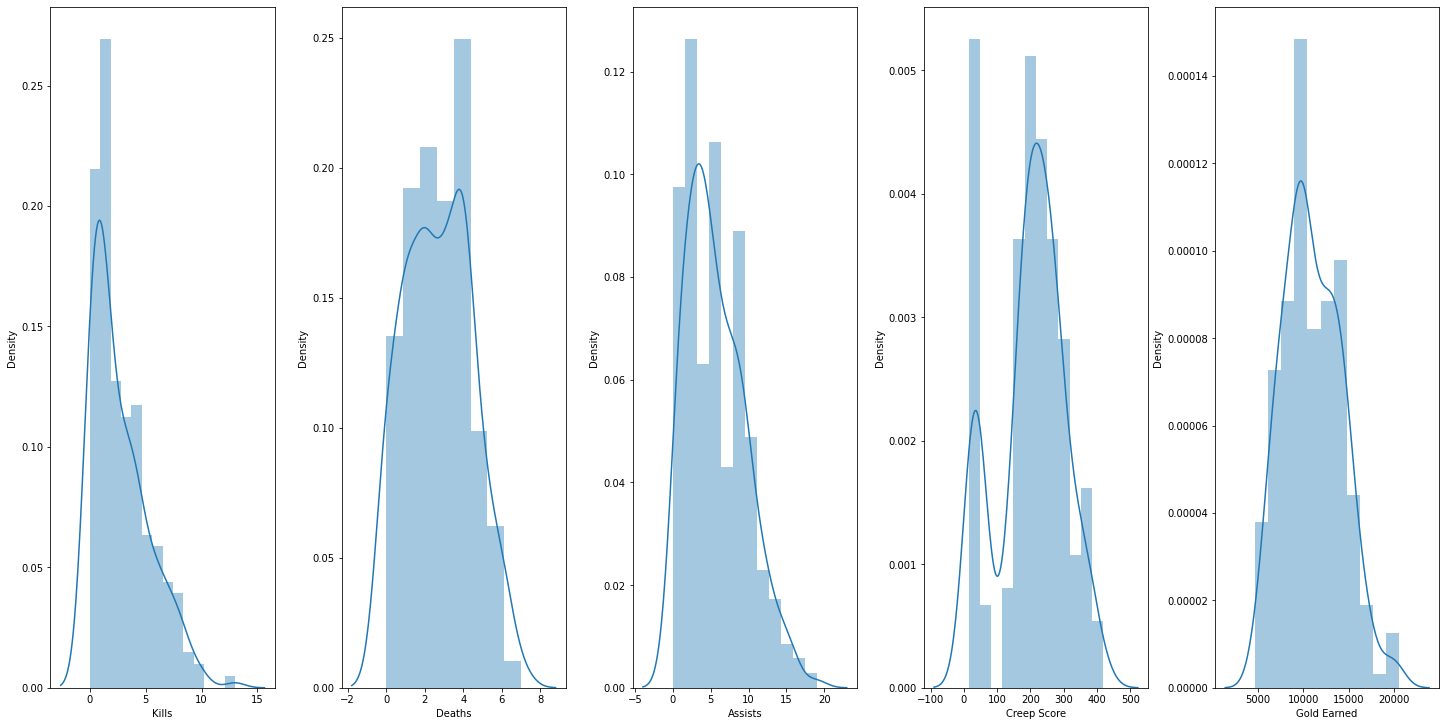

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in lol_subset.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

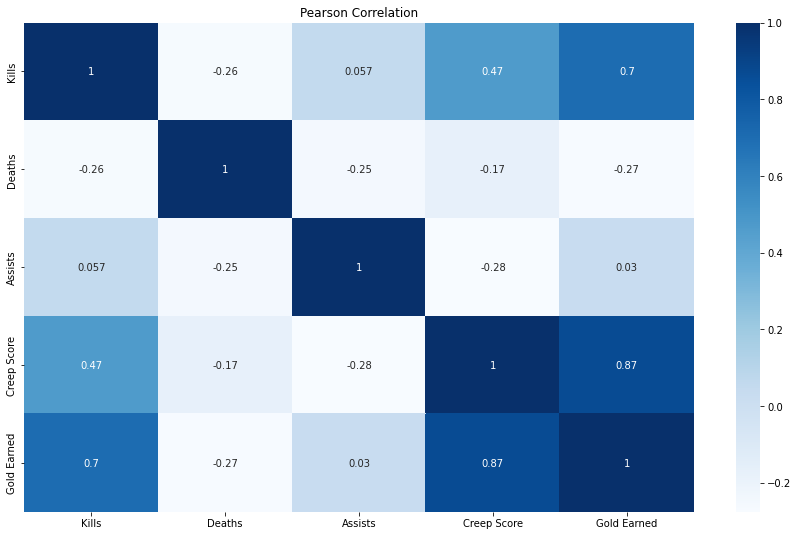

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(lol_subset.corr(), annot = True, cmap = 'Blues')
plt.title("Pearson Correlation")
plt.show()

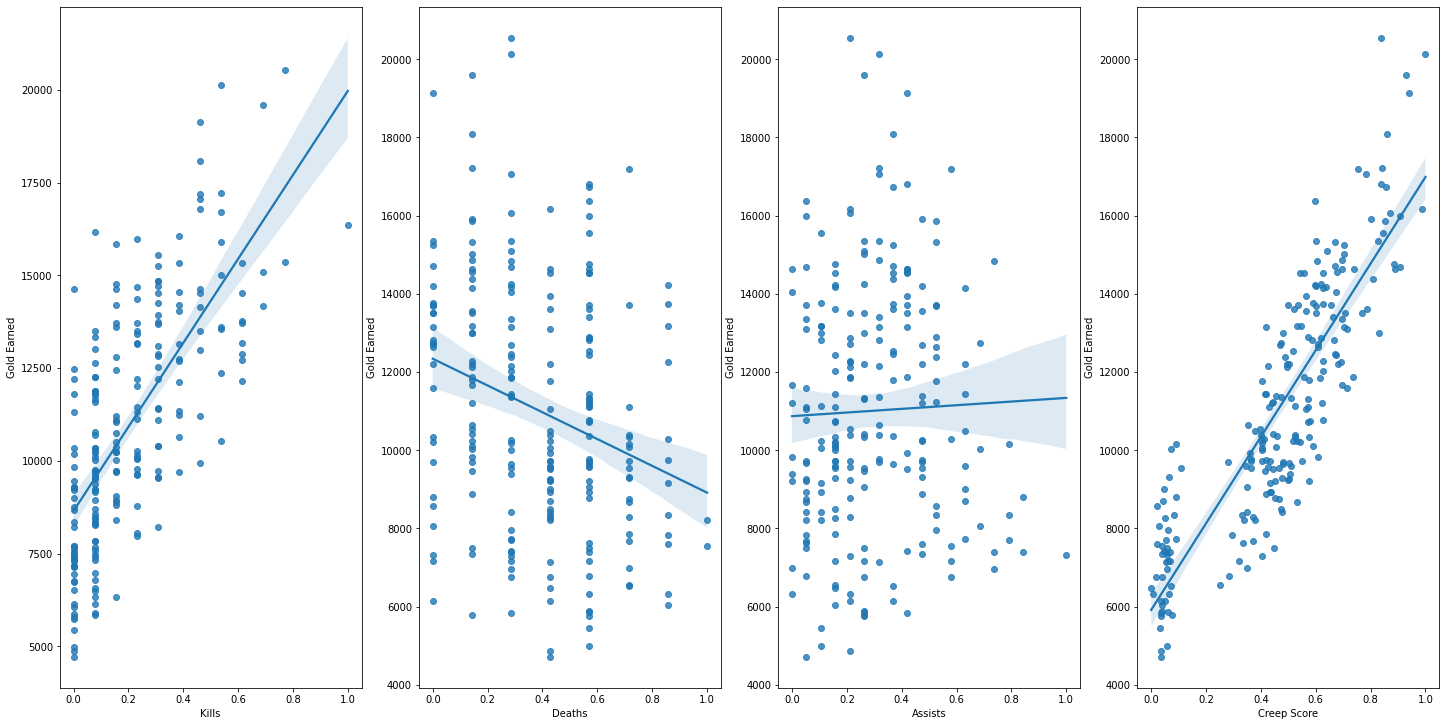

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Kills', 'Deaths',
       'Assists', 'Creep Score']
x = lol_subset.loc[:,column_sels]
y = lol_subset['Gold Earned']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 4)

In [ ]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.intercept_

4418.176592812175

In [ ]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Kills,5215.201431
1,Deaths,-172.696797
2,Assists,3344.150918
3,Creep Score,9841.614094


:Gold Earned=5215.201431*Kills+-172.696797*Deaths+3344.150918*Assists+9841.614094*Creep Score+4418.176592812175

In [ ]:
y_pred = lm.predict(X_train)

In [ ]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8943838488179225
Adjusted R^2: 0.891548515900283
MAE: 771.1722235100755
MSE: 983732.8259831761
RMSE: 991.8330635662314


In [ ]:
y_test_pred = lm.predict(X_test)

In [ ]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9290311147018367
Adjusted R^2: 0.9243774173052359
MAE: 738.8151206693088
MSE: 867184.9155665493
RMSE: 931.227638961897
